In [1]:
# The code is importing various modules and functions from the scikit-learn and pandas libraries.
import pandas as pd
import joblib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The code `df = pd.read_csv('austin_weather.csv')` is reading the contents of the file 'austin_weather.csv' and storing it in a pandas DataFrame called `df`.
df = pd.read_csv('austin_weather.csv')

In [3]:
# The code is performing preprocessing steps on a dataset stored in a DataFrame called `df`.

# The code is performing date preprocessing on the 'Date' column of the DataFrame `df`.
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.drop(columns='Date',inplace=True)

# The code is creating an empty list called `columns_with_symbol`. It then iterates over each column in the DataFrame `df` and checks if any value in that column contains the '-' symbol. If it does, the column name is appended to the `columns_with_symbol` list.
columns_with_symbol = []
for col in df.columns:
    if df[col].apply(str).str.contains('-', na=False).any():
        columns_with_symbol.append(col)

# The code is iterating over each column in the DataFrame `df` that contains the '-' symbol. It then replaces all occurrences of '-' with an empty string in that column using the `replace()` method. Finally, it converts the values in that column to numeric data type using the `pd.to_numeric()` function. This is done to clean and transform the data in those columns, making them suitable for further analysis or modeling.
for col in columns_with_symbol:
    df[col] = df[col].replace('-','')
    df[col] = pd.to_numeric(df[col])

# The code `df['PrecipitationSumInches'] = df['PrecipitationSumInches'].replace('T', '')` is replacing the string value 'T' in the 'PrecipitationSumInches' column of the DataFrame `df` with an empty string. This is done to remove any occurrences of 'T' in the column.
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].replace('T', '')
df['PrecipitationSumInches'] = pd.to_numeric(df['PrecipitationSumInches'])

# The code `encoder = LabelEncoder()` creates an instance of the `LabelEncoder` class, which is used for encoding categorical variables into numerical labels.
encoder = LabelEncoder()
df['Events'] = encoder.fit_transform(df['Events'])

# The code `df.dropna(inplace = True)` is removing any rows from the DataFrame `df` that contain missing values (NaN) and modifying the DataFrame in-place. The `inplace=True` parameter ensures that the changes are made directly to the DataFrame `df` without creating a new DataFrame.
df.dropna(inplace = True)

In [4]:

# The code is splitting the dataframe `df` into two parts: `X` and `y`.
X = df.drop(['PrecipitationSumInches'], axis=1)
y = df['PrecipitationSumInches']

print(X.columns)
print(y.describe())

# The code is performing feature scaling on the dataframe `X` using the `StandardScaler` class from the `sklearn.preprocessing` module.
sc = StandardScaler()
x_std = sc.fit_transform(X)
x_std = pd.DataFrame(x_std, columns=X.columns)

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'Events', 'Day', 'Year',
       'Month'],
      dtype='object')
count    1183.000000
mean        0.127380
std         0.450287
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         5.200000
Name: PrecipitationSumInches, dtype: float64


In [5]:
# The line `x_train, x_test, y_train, y_test = train_test_split(x_std, y)` is splitting the dataset into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.20)

# `reg = linear_model.LinearRegression()` is creating an instance of the LinearRegression class from the linear_model module. This instance, `reg`, will be used to fit the training data and make predictions using linear regression.
reg = linear_model.LinearRegression()

# `reg.fit(x_train, y_train)` is fitting the linear regression model to the training data. This means that the model is learning the relationship between the input features `x_train` and the corresponding target values `y_train`. The model will adjust its parameters to minimize the difference between the predicted values and the actual values in the training data.
reg.fit(x_train, y_train)

# `y_pred = reg.predict(x_test)` is using the trained linear regression model (`reg`) to make predictions on the test data (`x_test`). The predicted values are stored in the variable `y_pred`.
y_pred = reg.predict(x_test)


Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.38
R-squared (R2) Score: 0.32


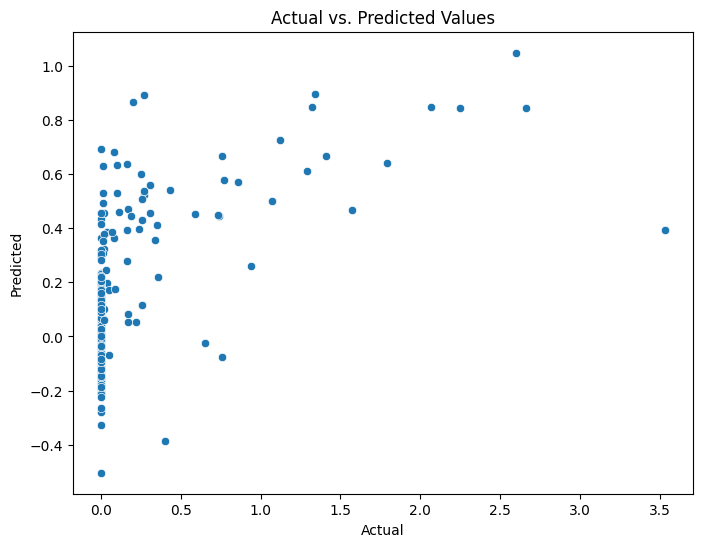

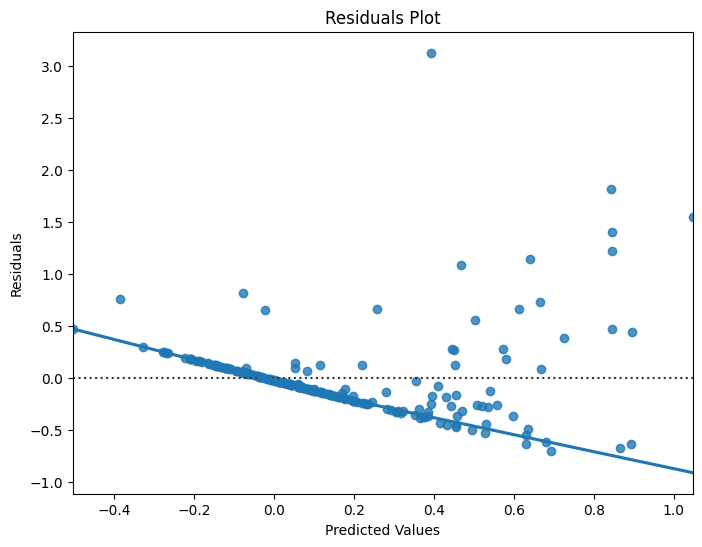

In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Visualization - Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Visualization - Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [7]:
# The code `joblib.dump(reg, './model_new.pkl')` is using the `joblib` library to save the `reg` object (presumably a trained machine learning model) to a file named `model_new.pkl` in the current directory. This allows the model to be saved and loaded later for future use.
joblib.dump(reg, './model_new.pkl')

['./model_new.pkl']